In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("resnet18_3d_seg.csv")
df

,train_loss,val_loss,fbeta_0.20,fbeta_0.25,fbeta_0.30,fbeta_0.35,fbeta_0.40,fbeta_0.45,fbeta_0.50,fbeta_0.55,fbeta_0.60,fbeta_0.65,fbeta_0.70,fbeta_0.75,fbeta_0.80,fbeta_0.85,fbeta_0.90,fbeta_0.95,epoch
0,0.390864,0.485314,0.543608,0.541204,0.536595,0.530991,0.525674,0.520298,0.513919,0.505047,0.493462,0.477471,0.456330,0.430278,0.397119,0.352343,0.290018,0.187237,1
1,0.385209,0.461497,0.367918,0.390930,0.407032,0.419103,0.429135,0.438350,0.448355,0.457406,0.466067,0.475074,0.482676,0.487826,0.492183,0.491505,0.480158,0.417918,2
2,0.381270,0.471801,0.373847,0.397016,0.411175,0.421625,0.430089,0.437267,0.443602,0.449748,0.455826,0.461009,0.466101,0.471872,0.478434,0.483375,0.484553,0.450465,3
3,0.375756,0.630911,0.284619,0.295155,0.301981,0.307610,0.312430,0.316913,0.321381,0.326373,0.332198,0.339390,0.348673,0.361439,0.378169,0.399574,0.430679,0.462796,4
4,0.390892,0.474873,0.368924,0.392272,0.405987,0.415830,0.423805,0.430280,0.436176,0.442309,0.448965,0.455981,0.463657,0.472900,0.484070,0.495649,0.505002,0.467699,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0.334830,0.497237,0.368133,0.380033,0.387446,0.393204,0.398106,0.403157,0.408235,0.413101,0.417886,0.422773,0.427761,0.433270,0.441284,0.436582,0.324445,0.014857,126
126,0.353213,0.512755,0.390935,0.397127,0.401277,0.405187,0.408670,0.411445,0.414025,0.416649,0.419027,0.421310,0.424034,0.426795,0.429433,0.434242,0.405364,0.127336,127
127,0.346908,0.515281,0.432089,0.438484,0.443028,0.446525,0.449647,0.451852,0.454355,0.457351,0.460192,0.462349,0.464052,0.464941,0.463339,0.449810,0.366400,0.061145,128
128,0.363992,0.508374,0.427963,0.435086,0.440502,0.445080,0.448926,0.452274,0.455948,0.459319,0.462291,0.464946,0.467666,0.470210,0.471921,0.465668,0.429069,0.233567,129


(0.3, 0.65)

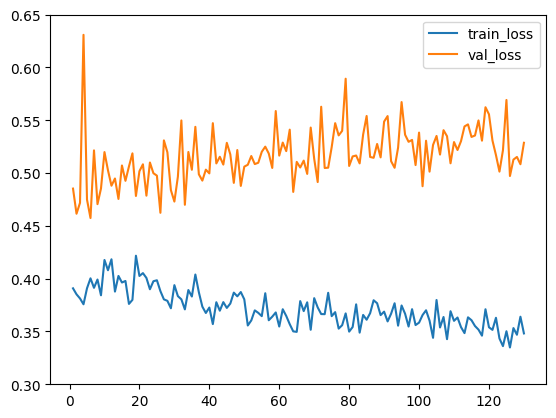

In [38]:
plt.plot(df["epoch"], df["train_loss"], label="train_loss")
plt.plot(df["epoch"], df["val_loss"], label="val_loss")
# plot the moving average of the validation loss
# plt.plot(df["epoch"], df["val_loss"].rolling(20).mean(), label="val_loss")

plt.legend()
plt.ylim(0.3, 0.65)

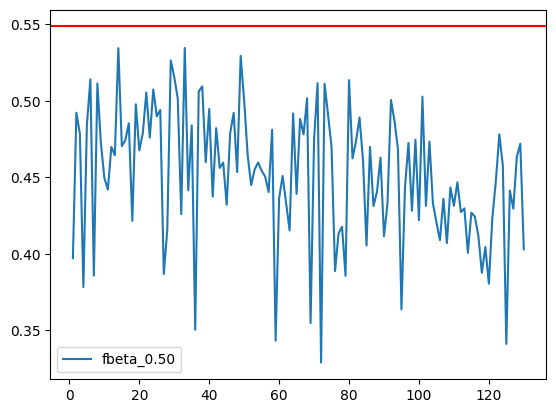

In [39]:
plt.plot(df["epoch"], df["fbeta_0.80"], label="fbeta_0.50")
# plt.plot(df["epoch"], df["fbeta_0.95"].rolling(20).mean(), label="fbeta_0.50")


# set horizontal line at 0.5486
plt.axhline(y=0.5486, color='r', linestyle='-')

plt.legend()
# plt.ylim(0.4, 1)


(130, 16)


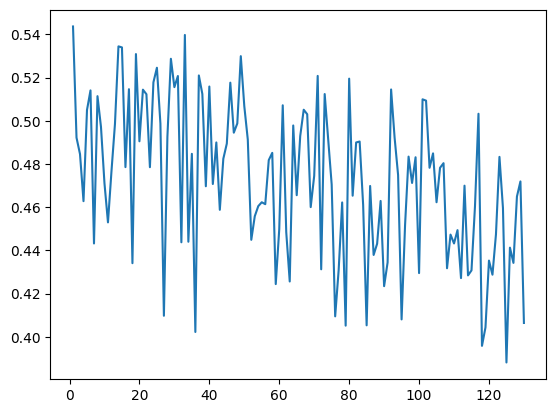

In [40]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
print(df_fbeta.shape)
df_fbeta = np.max(df_fbeta, axis=1)
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")

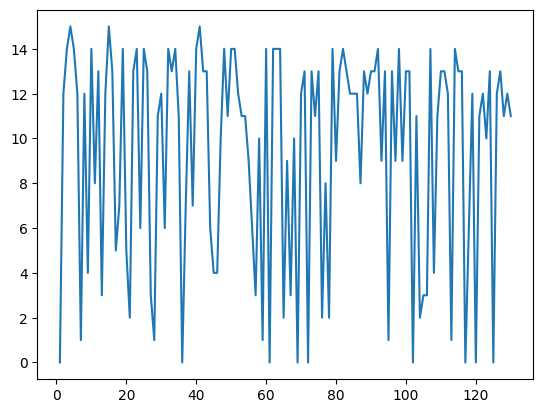

In [41]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
df_fbeta = np.argmax(df_fbeta, axis=1)
df_fbeta.shape
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")

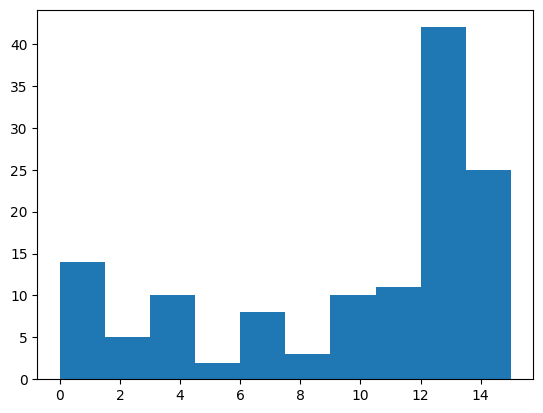

In [42]:
plt.hist(df_fbeta, bins=10);